In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
os.getcwd()

In [ ]:
heartDisease = pd.read_csv('heart.csv')
heartDisease.head()

### Variables included in the original dataset include:
#### Age: Age of the patient
#### Sex: Gender of the patient
#### Chest Pain Type: ATA = Atypical Angina, TA = Typical Angina, NAP: Non Anginal Pain, ASY = Asymptomatic
#### Resting Blood Pressure: Resting Blood Pressure of the Patient
#### Cholesterol: Cholesterol of the Patient
#### Fasting Blood Sugar: Binary Response indicating if a patient's fasting blood sugar level is greater than 120mg
#### Resting ECG: Normal = no abnormalities, ST = Patient has ST abnormality, LVH = Patient has left ventricular hypertrophy
#### Max Heart Rate: Maximum tested heart rate of the patient
#### Exercise Angina: Does patient exhibit exercise induced angina (Y/N)
#### Old Peak: Patient's previously recorded ST level peak
#### ST Slope: Is the patients ST level increasing, decreasing, or level? (up, down, flat)

### In the following step, we will address the non-numeric features Sex, ChestPainType, RestingECG, ExcerciseAngina, and ST_Slope, by creating dummy variables for each potential outcome

In [ ]:
heartDisease = pd.concat([heartDisease, pd.get_dummies(heartDisease['Sex'], prefix='gender', drop_first=False)], axis=1)
heartDisease = pd.concat([heartDisease, pd.get_dummies(heartDisease['ChestPainType'], prefix='cpType', drop_first=False)], axis=1)
heartDisease = pd.concat([heartDisease, pd.get_dummies(heartDisease['RestingECG'], prefix='restECG', drop_first=False)], axis=1)
heartDisease = pd.concat([heartDisease, pd.get_dummies(heartDisease['ExerciseAngina'], prefix='excAng', drop_first=False)], axis=1)
heartDisease = pd.concat([heartDisease, pd.get_dummies(heartDisease['ST_Slope'], prefix='stSlope', drop_first=False)], axis=1)

### In the following step we will drop the original non numeric variables, as we now have categorical features for each and we will also choose which of the categorical variables to drop - we will drop one categorical feature from each group to address two issues, 1. to remove perfect multicollinearity from including each 2. to determine which variable will serve as the base line for each group

#### We have chosen to drop gender = F, therefore the baseline read will be for a female patient, where gender_M=1, we will be interpreting that as the change in the likelihood of the male patient exhibiting heart disease over a Female patient. Similarly, we are dropping the Asymptomatic Chest Pain feature, the Normal ECG feature, the excercise induced angina = No feature, and the ST Slope = flat feature

In [ ]:
heartDisease = heartDisease.drop(columns=['Sex', 'ChestPainType','RestingECG','ExerciseAngina','ST_Slope','gender_F','cpType_ASY','restECG_Normal','excAng_N','stSlope_Flat'])

#### The following step will rename some of the features to a more reader friendly naming convention

In [ ]:
heartDisease.rename({'gender_M': 'male'}, axis=1, inplace=True)
heartDisease.rename({'cpType_ATA': 'atypical_angina'}, axis=1, inplace=True)
heartDisease.rename({'cpType_TA': 'typical_angina'}, axis=1, inplace=True)
heartDisease.rename({'cpType_NAP': 'non_anginal_pain'}, axis=1, inplace=True)
heartDisease.rename({'restECG_LVH': 'lv_hypertrophy'}, axis=1, inplace=True)
heartDisease.rename({'restECG_ST': 'st_abnormality'}, axis=1, inplace=True)
heartDisease.rename({'excAng_Y': 'exc_induced_angina'}, axis=1, inplace=True)
heartDisease.rename({'FastingBS': 'fastingBS_gt120mg'}, axis=1, inplace=True)

In [ ]:
heartDisease.isnull().sum()

In [ ]:
heartDisease.shape

In [ ]:
heartDisease.describe()

In [ ]:
(heartDisease['Cholesterol'] == 0).sum()

In [ ]:
(heartDisease['RestingBP'] == 0).sum()

#### There are 172 observations of Cholesterol that equal zero and 1 observation of resting blood pressure, this is not a realistic observation in either case, therefore we should treat these as not accurately reported and find a manner by which to replace these observations.

In [ ]:
sns.distplot(heartDisease.Cholesterol.dropna())

In [ ]:
heartDisease.groupby('male').mean()

#### As seen above, other than the cholesterol observations recorded as 0, this feature is normally distributed. Since this feature is normally distributed, we can replace zero values with the mean value of the other observations without biasing the distribution.  However, if we replace all missing values with the mean, then this will impact the variance in the distribution, so in order to achieve a more representative distribution of missing values, we will group our mean replacement values by gender and age. Which as you will see in the following histogram, by doing so we get a comparable distribution to the original distribution.

In [ ]:
heartDisease['Cholesterol']=heartDisease['Cholesterol'].replace(0,np.nan)

In [ ]:
heartDisease['Cholesterol']=heartDisease['Cholesterol'].fillna(heartDisease.groupby(['male','Age'])['Cholesterol'].transform('mean'))

In [ ]:
sns.distplot(heartDisease.Cholesterol.dropna())

In [ ]:
heartDisease['RestingBP']=heartDisease['RestingBP'].replace(0,np.nan)

#### There was one observation of cholesterol that did not have a representative age/gender cohort from which to find a mean replacement value. Therefore, we will now use a mean replacement value grouping by gender only, and will do the same for resting blood pressure.

In [ ]:
heartDisease['Cholesterol']=heartDisease['Cholesterol'].fillna(heartDisease.groupby(['male'])['Cholesterol'].transform('mean'))

In [ ]:
heartDisease['RestingBP']=heartDisease['RestingBP'].fillna(heartDisease.groupby(['male'])['RestingBP'].transform('mean'))

In [32]:
heartDisease.head()

,Age,RestingBP,Cholesterol,fastingBS_gt120mg,MaxHR,Oldpeak,HeartDisease,male,atypical_angina,non_anginal_pain,typical_angina,lv_hypertrophy,st_abnormality,exc_induced_angina,stSlope_Down,stSlope_Up
0,40,140.0,289.0,0,172,0.0,0,1,1,0,0,0,0,0,0,1
1,49,160.0,180.0,0,156,1.0,1,0,0,1,0,0,0,0,0,0
2,37,130.0,283.0,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138.0,214.0,0,108,1.5,1,0,0,0,0,0,0,1,0,0
4,54,150.0,195.0,0,122,0.0,0,1,0,1,0,0,0,0,0,1


In [23]:
numeric_features = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
cat_features = ['fastingBS_gt120mg','male','atypical_angina','non_anginal_pain','typical_angina','lv_hypertrophy','st_abnormality','exc_induced_angina','stSlope_Down','stSlope_Up']

## The following code provides some formatting for visualization outputs

In [25]:
sns.set_theme(rc = {'grid.linewidth': 0.6, 'grid.color': 'white',
                    'axes.linewidth': 2, 'axes.facecolor': '#ECECEC', 
                    'axes.labelcolor': '#000000',
                    'figure.facecolor': '#f7f7f7',
                    'xtick.color': '#000000', 'ytick.color': '#000000'})

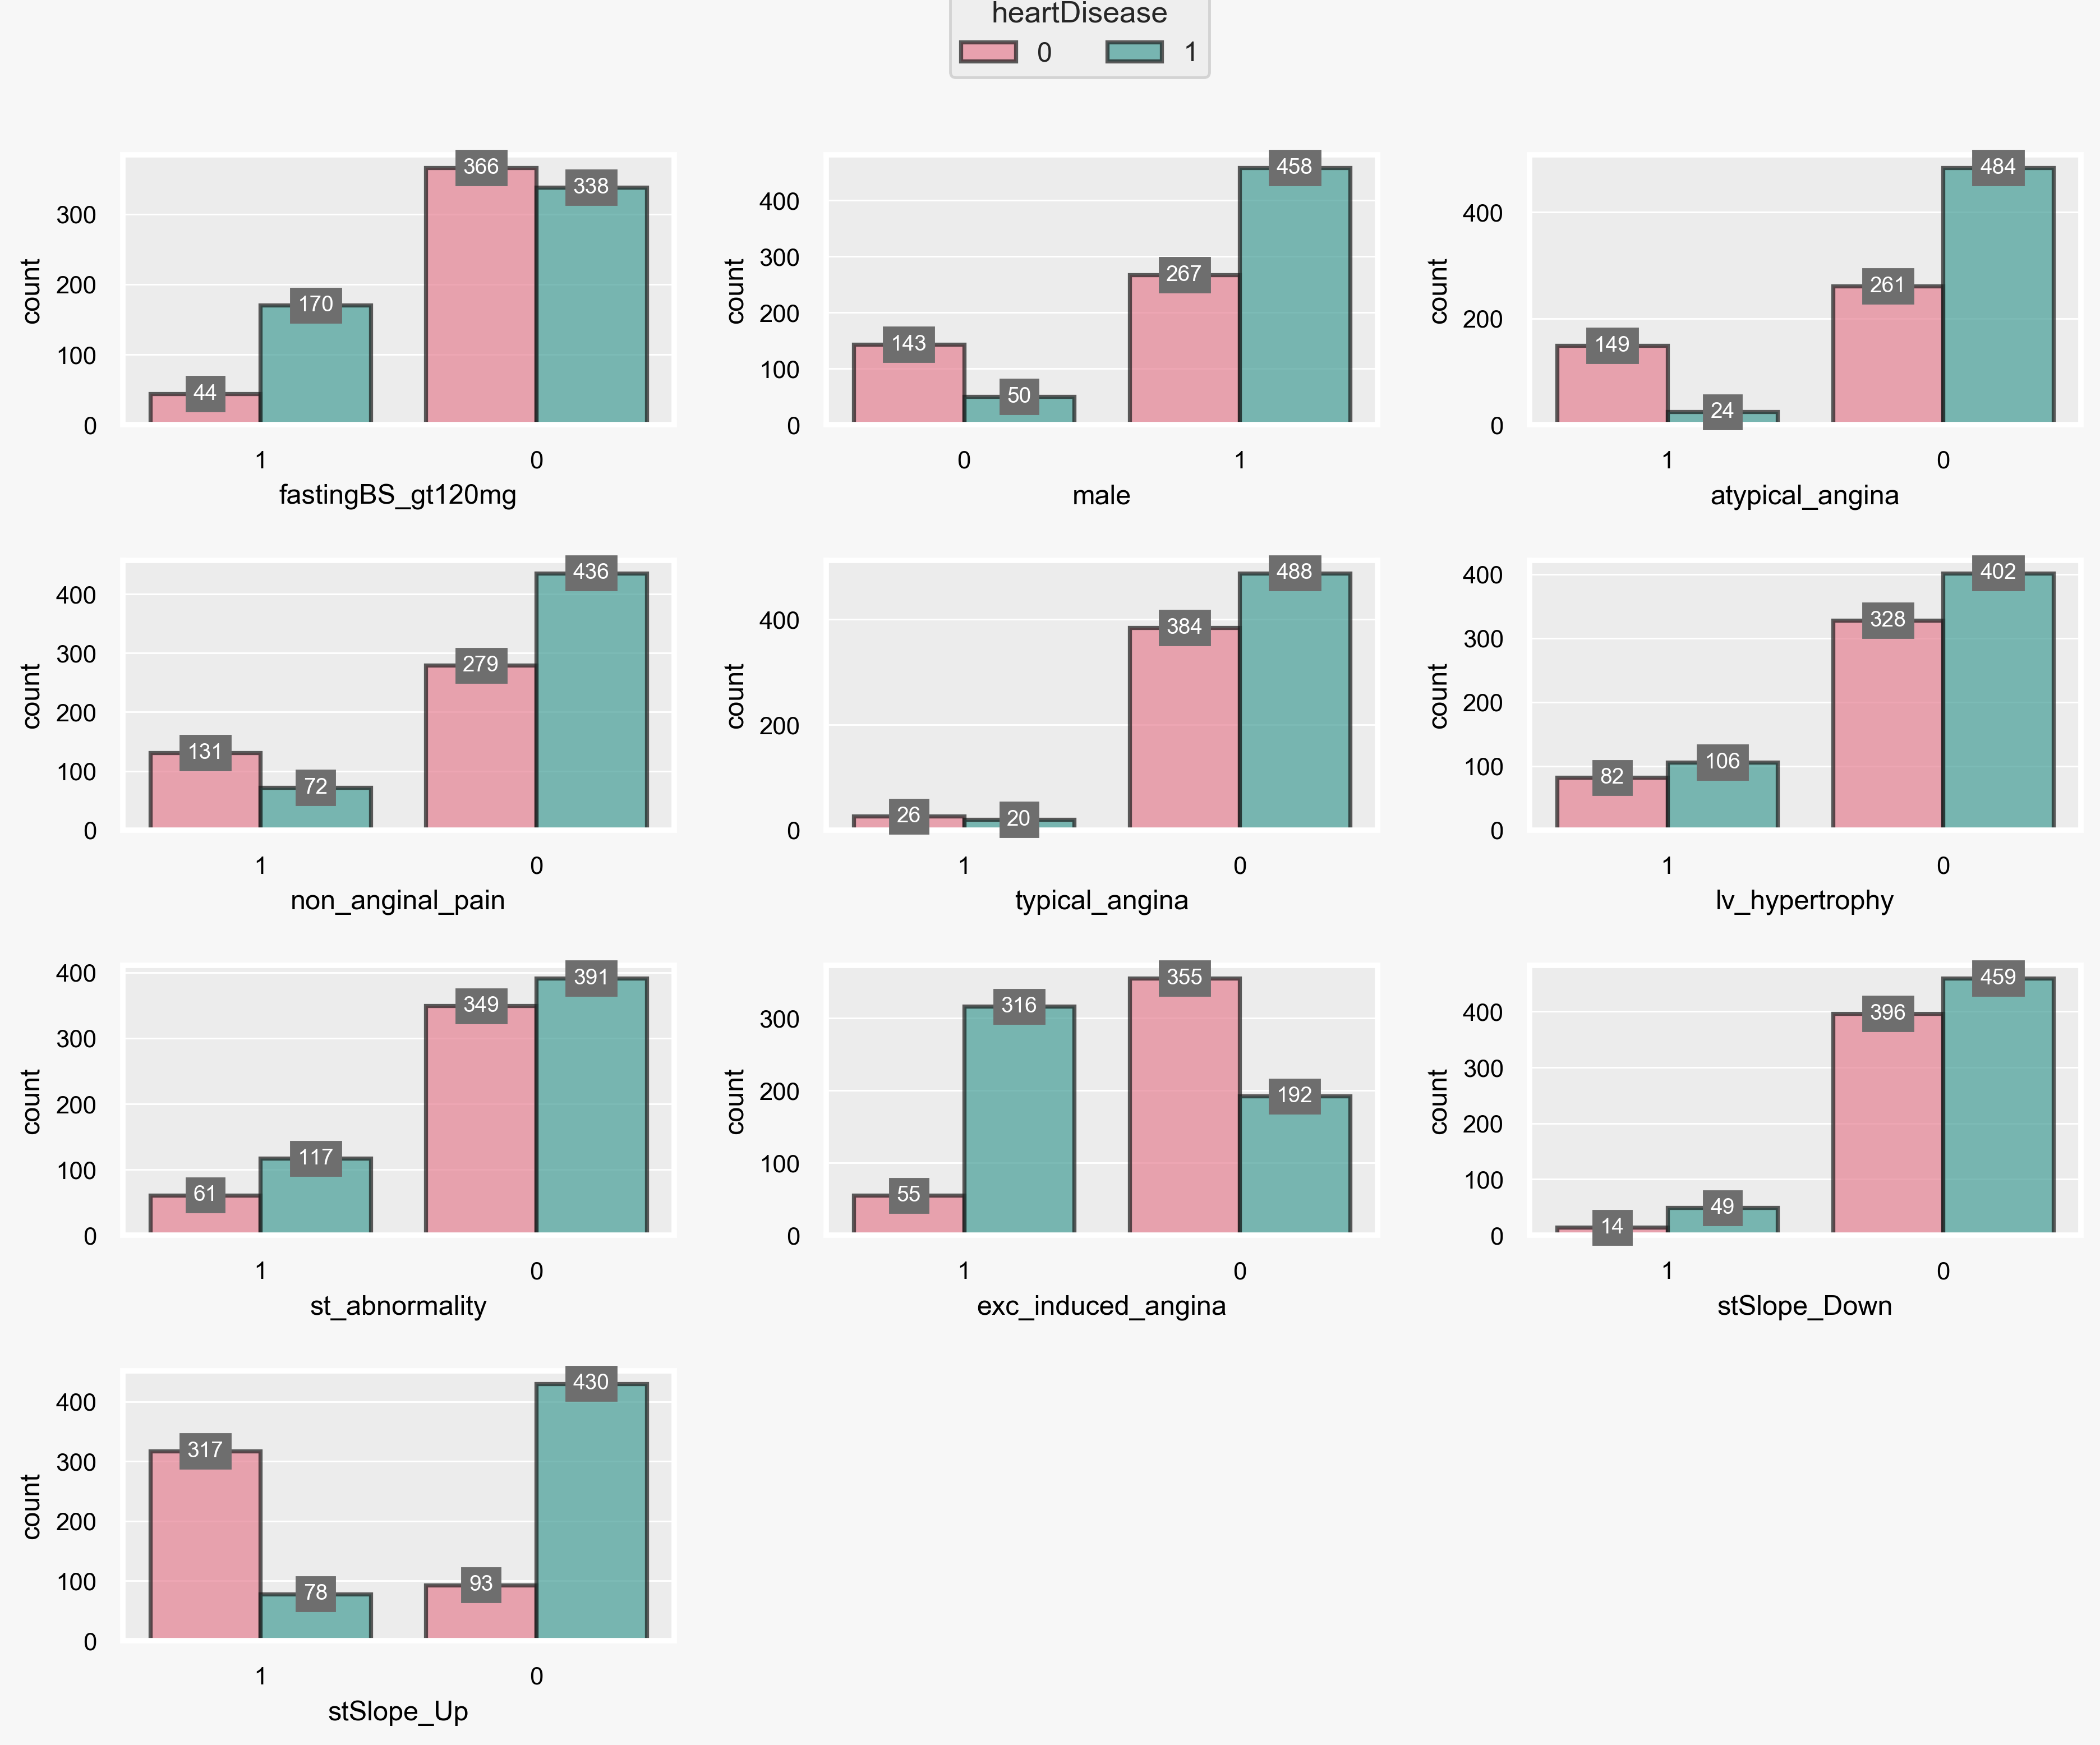

In [36]:
with plt.rc_context(rc = {'figure.dpi': 350, 'axes.labelsize': 10, 
                          'xtick.labelsize': 9, 'ytick.labelsize': 9}):

    fig_1, ax_1 = plt.subplots(4, 3, figsize = (11, 8.5))
    
    for idx, (column, axes) in list(enumerate(zip(cat_features, ax_1.flatten()))):
        
        order = heartDisease.groupby(column).size().sort_values(ascending = True).index.tolist()
    
        cplot = sns.countplot(ax = axes, x = heartDisease[column], hue = heartDisease['HeartDisease'],
                              order = order, linewidth = 1.5,
                              edgecolor = 'k', palette = 'husl', alpha = 0.7)
        
        axes.get_legend().remove()
        
        for p in cplot.patches:
        
            cplot.annotate(format(p.get_height(), '.0f'), 
                           (p.get_x() + p.get_width() / 2, p.get_height()), 
                           ha = 'center', va = 'center', size = 8, color = 'w',
                           bbox = dict(boxstyle = 'square, pad = 0.3', 
                           fc = '#6e6e6e', lw = 1, ec = '#6e6e6e'))
    
    else:
    
        [axes.set_visible(False) for axes in ax_1.flatten()[idx + 1:]]
    
    ### A global legend
    
    handles, labels = axes.get_legend_handles_labels()
    fig_1.legend(handles, labels, loc = 'upper center', 
                 bbox_to_anchor = (0.5, 1.06), ncol = 2, fontsize = 10,
                 title = 'heartDisease', title_fontsize = 11)        

    plt.tight_layout(pad = 1.5)
    plt.show()

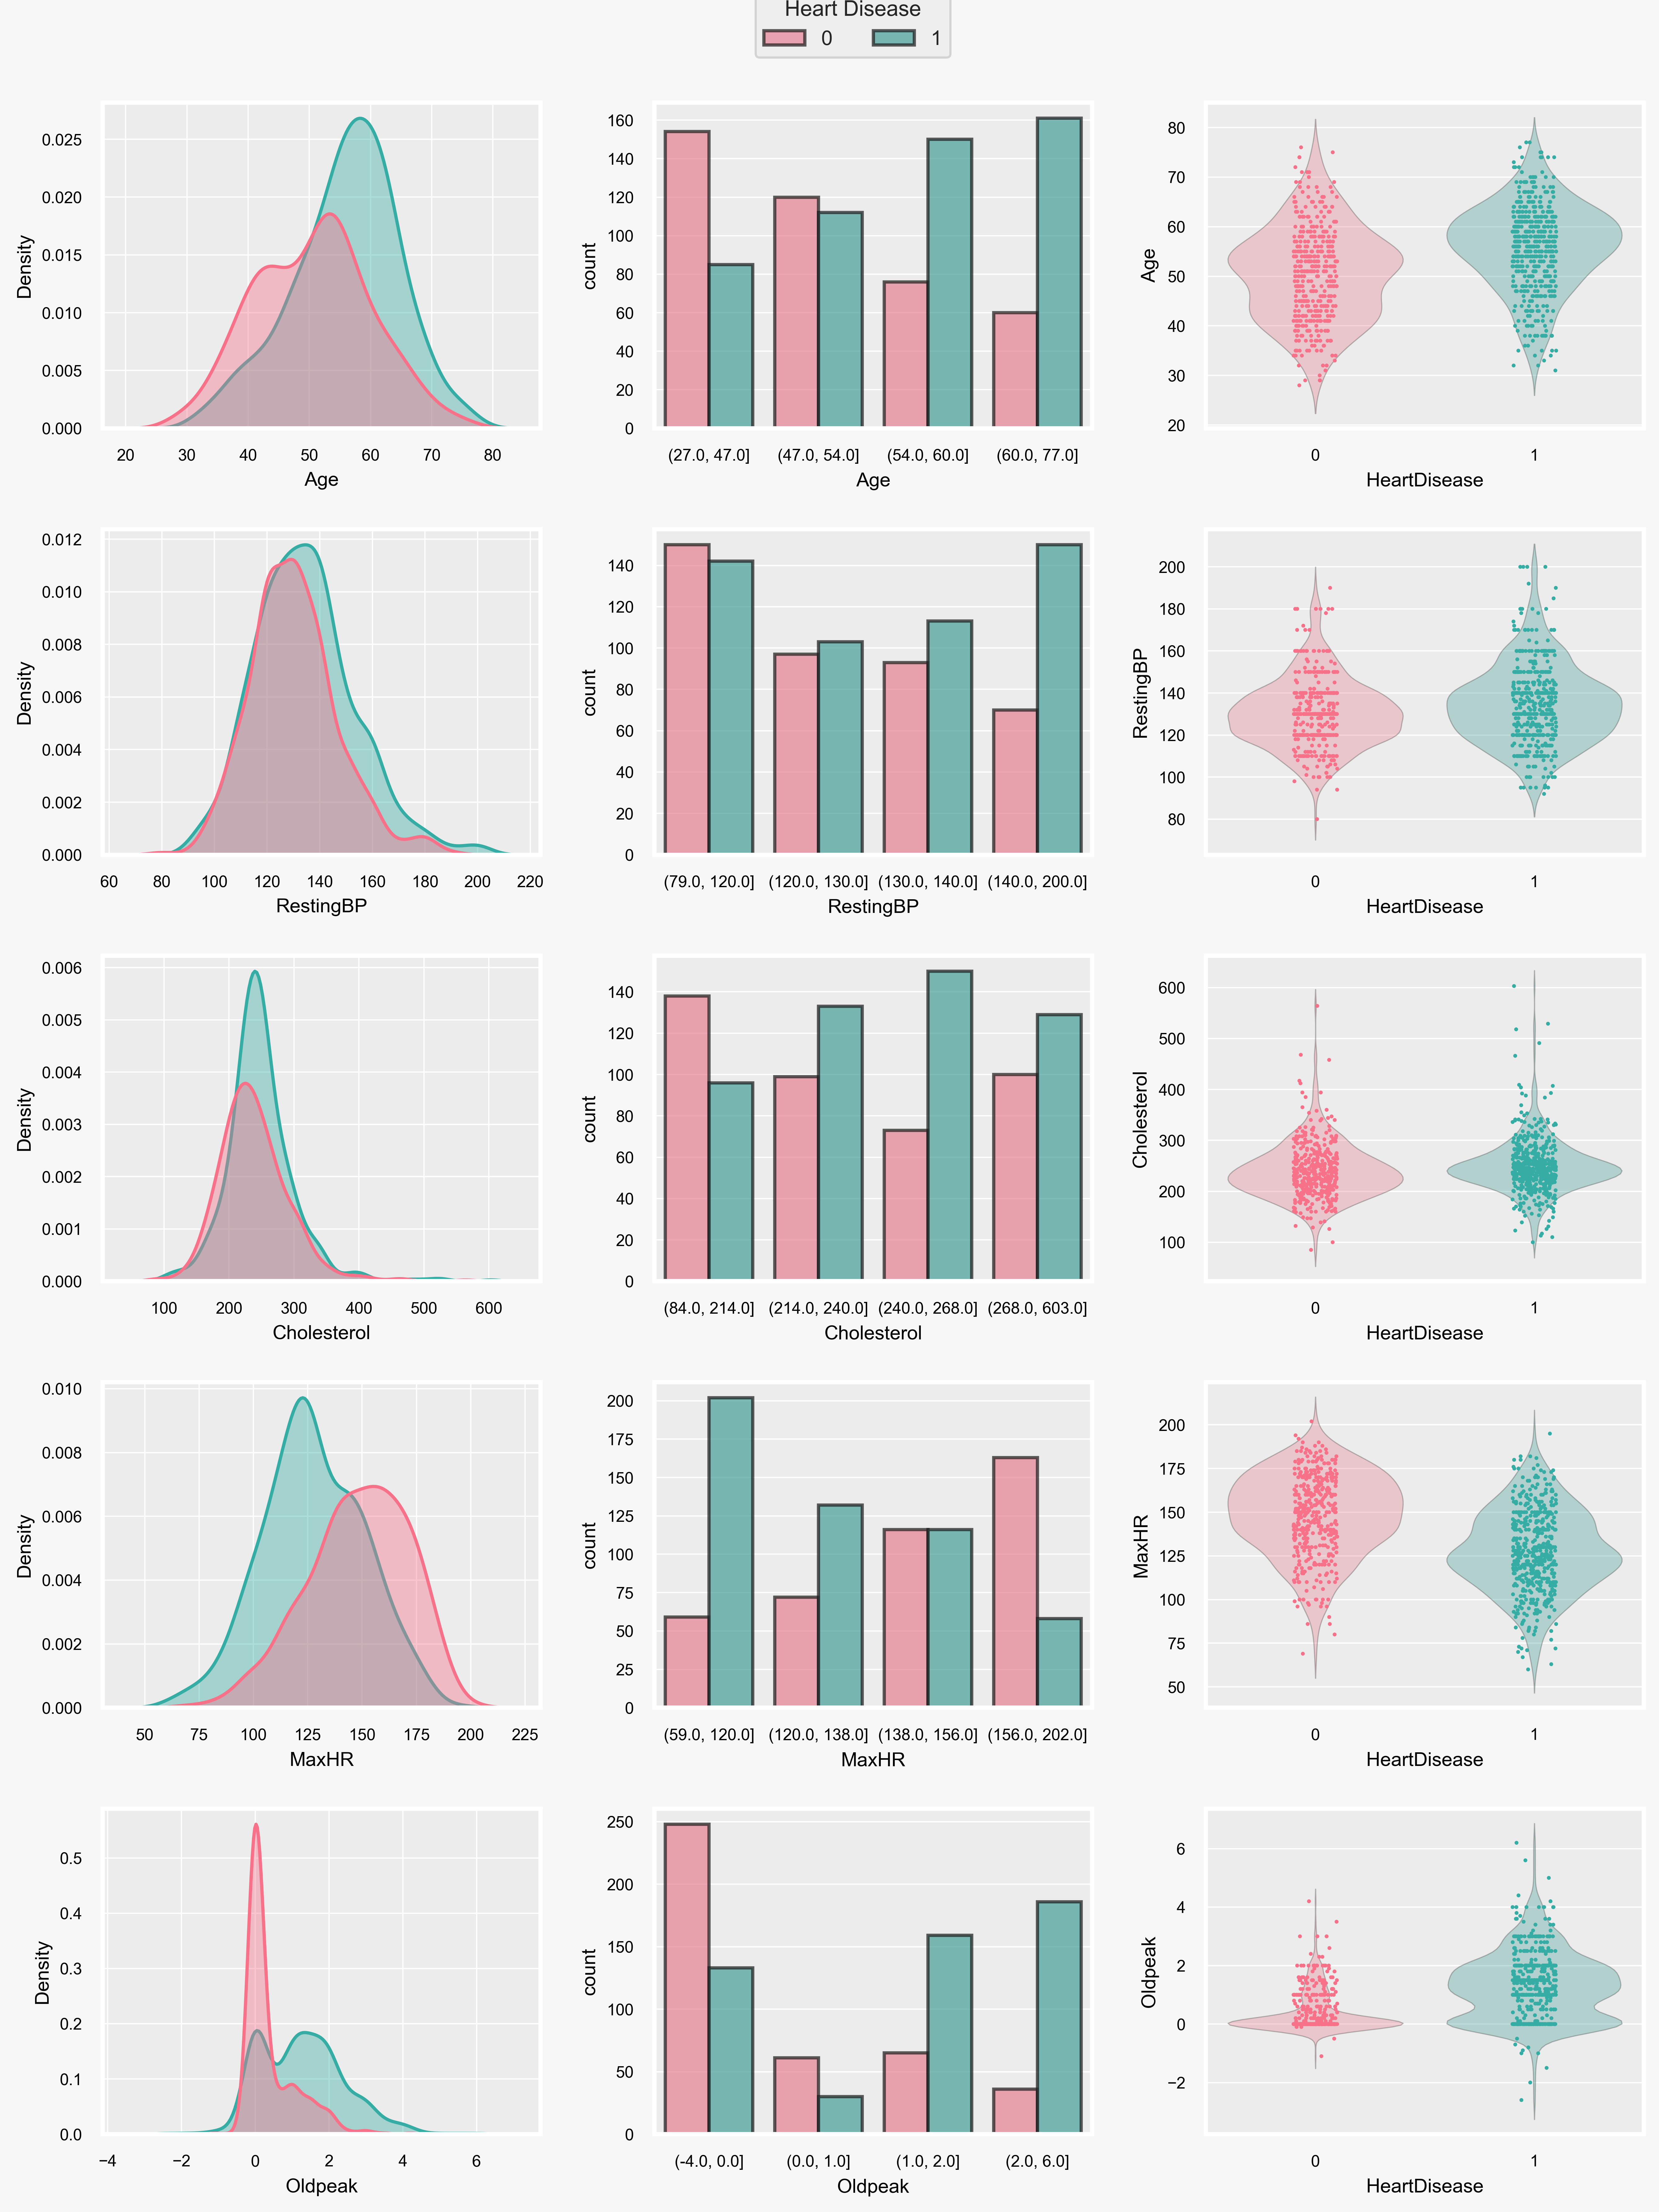

In [40]:
with plt.rc_context(rc = {'figure.dpi': 500, 'axes.labelsize': 9, 
                          'xtick.labelsize': 7.5, 'ytick.labelsize': 7.5}):

    fig_2, ax_2 = plt.subplots(5, 3, figsize = (11, 14))
    
    col_no = 0

    for column in numeric_features:
        
        ### KDE plots
    
        sns.kdeplot(ax = ax_2[col_no, 0], x = heartDisease[column], 
                    hue = heartDisease['HeartDisease'],
                    common_norm = True,
                    fill = True, alpha = 0.4, palette = 'husl',
                    linewidth = 1.5)
        
        ax_2[col_no, 0].get_legend().remove()
        
        ### Quantile-based discretization
        
        cuts = pd.qcut(heartDisease[column], 4, precision = 0)
        
        sns.countplot(ax = ax_2[col_no, 1], x = cuts, 
                      hue = heartDisease['HeartDisease'], 
                      linewidth = 1.5, edgecolor = 'k', 
                      palette = 'husl', alpha = 0.7)
        
        ax_2[col_no, 1].get_legend().remove()
        
        #### Violinplots & stripplots
        
        sns.violinplot(ax = ax_2[col_no, 2], x = heartDisease['HeartDisease'], 
                       y = heartDisease[column], palette = 'husl', scale = 'width',
                       linewidth = 0.5, inner = None)
        
        plt.setp(ax_2[col_no, 2].collections, alpha = 0.35)
        
        sns.stripplot(ax = ax_2[col_no, 2], x = heartDisease['HeartDisease'], 
                      y = heartDisease[column], palette = 'husl', alpha = 1,
                      s = 1.8, jitter = 0.1)
        col_no += 1
    
    ### A global legend
    
    handles, labels = ax_2[4, 1].get_legend_handles_labels()
    fig_2.legend(handles, labels, loc = 'upper center', 
                 bbox_to_anchor = (0.5, 1.027), ncol = 2, 
                 fontsize = 9.5, title = 'Heart Disease', title_fontsize = 10)
    
    plt.tight_layout(pad = 1.5)
    plt.show()

## define predictor (X) and target (y) data sets

In [42]:
X = heartDisease.drop(['HeartDisease'], axis=1)
y = heartDisease['HeartDisease']

## Implement a Classification algorithm to see if there are groups that can be identified for differing Risk evaluations

In [46]:
from sklearn.cluster import KMeans

In [50]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [52]:
X.head()

,Age,RestingBP,Cholesterol,fastingBS_gt120mg,MaxHR,Oldpeak,male,atypical_angina,non_anginal_pain,typical_angina,lv_hypertrophy,st_abnormality,exc_induced_angina,stSlope_Down,stSlope_Up
0,40,140.0,289.0,0,172,0.0,1,1,0,0,0,0,0,0,1
1,49,160.0,180.0,0,156,1.0,0,0,1,0,0,0,0,0,0
2,37,130.0,283.0,0,98,0.0,1,1,0,0,0,1,0,0,1
3,48,138.0,214.0,0,108,1.5,0,0,0,0,0,0,1,0,0
4,54,150.0,195.0,0,122,0.0,1,0,1,0,0,0,0,0,1


In [51]:
centroids = (kmeans.cluster_centers_)
np.set_printoptions(suppress=True)
print(centroids)

[[ 53.50744048 131.02325663 220.54717705   0.25       135.48809524
    0.84806548   0.82440476   0.17410714   0.23958333   0.04910714
    0.18452381   0.20535714   0.38839286   0.06845238   0.43452381]
 [ 53.5203252  136.68699187 308.63943089   0.18699187 140.41869919
    0.99471545   0.69512195   0.22764228   0.17073171   0.05284553
    0.2601626    0.16260163   0.44715447   0.06910569   0.41869919]]


In [53]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X, kmeans.labels_))

0.3806202765098034


In [54]:
kmeans1 = KMeans(n_clusters=3, random_state=0).fit(X)

In [55]:
centroids = (kmeans1.cluster_centers_)
print(centroids)

[[ 51.09689922 131.06976744 189.57235142   0.14728682 143.91472868
    0.74922481   0.77131783   0.24418605   0.27131783   0.05426357
    0.18604651   0.18604651   0.29457364   0.0503876    0.56589147]
 [ 53.70469799 137.68456376 330.48657718   0.19463087 141.47651007
    0.97919463   0.6442953    0.2147651    0.16107383   0.04026846
    0.26174497   0.16778523   0.45637584   0.05369128   0.42281879]
 [ 54.67318982 131.78400871 246.53784014   0.28767123 131.86105675
    0.93033268   0.84148728   0.15264188   0.21330724   0.05088063
    0.19765166   0.20547945   0.44422701   0.08219178   0.36399217]]


In [56]:
print(silhouette_score(X, kmeans1.labels_))

0.2809587798736042


## With such low Silhouette Scores and no clear distinctions from the centroids amongst clusters, this data set does not appear to be a good candidate for clustering prior to implementing a classification or regression model

## Randomly partition the rows into training and validation set using a random seed of 500. Put 70% into the training partition and 30% into the testing partition

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=500)

In [59]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_train_pred_nb = nb.predict(X_train)

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_train_pred_nb)

array([[245,  44],
       [ 51, 302]])

In [61]:
from sklearn.metrics import accuracy_score
accuracy_nb_train = accuracy_score(y_true=y_train, y_pred=y_train_pred_nb)
accuracy_nb_train.round(2)

0.85

In [65]:
from sklearn.metrics import precision_score
precision_nb_train = precision_score(y_true=y_train, y_pred=y_train_pred_nb, average = None)
precision_nb_train.round(2)

array([0.83, 0.87])

In [66]:
from sklearn.metrics import recall_score
recall_nb_train = recall_score(y_true=y_train, y_pred=y_train_pred_nb, average = None)
recall_nb_train.round(2)

array([0.85, 0.86])

In [68]:
from sklearn.metrics import fbeta_score
fbeta_score(y_true=y_train, y_pred=y_train_pred_nb, average=None, beta=0.5)

array([0.83163612, 0.86931491])

In [69]:
y_test_pred_nb = nb.predict(X_test)
confusion_matrix(y_test,y_test_pred_nb)

array([[101,  20],
       [ 31, 124]])

In [70]:
accuracy_nb_test = accuracy_score(y_true=y_test, y_pred=y_test_pred_nb)
accuracy_nb_test.round(2)

0.82

In [71]:
precision_nb_test = precision_score(y_true=y_test, y_pred=y_test_pred_nb, average = None)
precision_nb_test.round(2)

array([0.77, 0.86])

In [72]:
recall_nb_test = recall_score(y_true=y_test, y_pred=y_test_pred_nb, average = None)
recall_nb_test.round(2)

array([0.83, 0.8 ])